In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os, glob
import matplotlib.animation as animation
import glob, re

import scienceplots
plt.style.use('default')
plt.style.use(['science', 'high-vis', 'grid'])


In [17]:
list_files = glob.glob("../../build/Profiles/*.csv")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


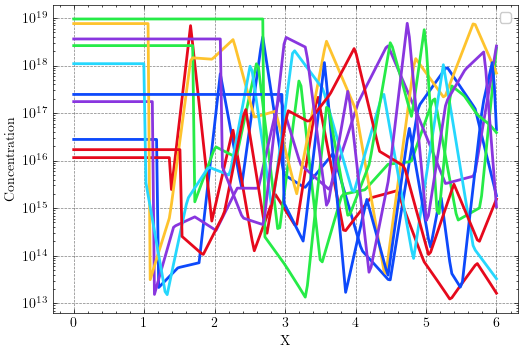

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
nbfiles = 10

colors = plt.cm.jet(np.linspace(0, 1, nbfiles))
for file in list_files[:nbfiles]:
    X, Nd, Na, D = np.loadtxt(file, delimiter=',', unpack=True, skiprows=1)
    ax.plot(X, np.abs(D), ls='-', lw=2)

ax.set_yscale('log')
ax.set_xlabel('X')
ax.set_ylabel('Concentration')
ax.legend()

Processing file 64/64

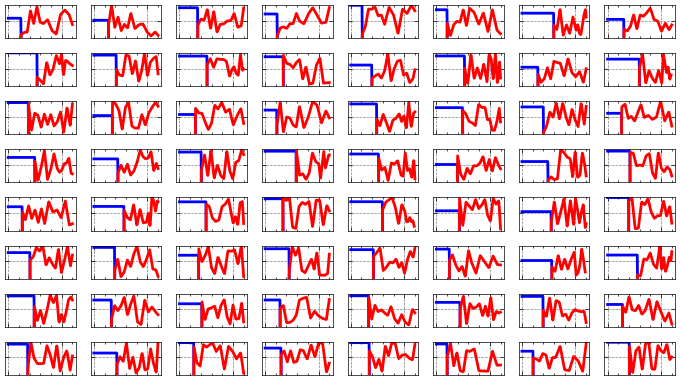

In [23]:
list_files = list_files[:64]
nfiles = len(list_files)
sqr = int(np.sqrt(nfiles))
fig, ax = plt.subplots(sqr, sqr, figsize=(7, 4), sharex=True, sharey=True)
for i, file in enumerate(list_files):
    print(f"\rProcessing file {i+1}/{nfiles}", end="")
    X, Nd, Na, D = np.loadtxt(file, delimiter=',', unpack=True, skiprows=1)
    ax[i//sqr, i%sqr].plot(X, np.abs(Nd), ls='-', lw=2,  c="b")
    ax[i//sqr, i%sqr].plot(X, np.abs(Na), ls='-', lw=2, c="r")
    ax[i//sqr, i%sqr].set_yscale('log')
    ax[i//sqr, i%sqr].set_ylim(bottom=5e12)
    # remove the x and y labels
    ax[i//sqr, i%sqr].set_xticklabels([])
    ax[i//sqr, i%sqr].set_yticklabels([])
    
# for i in range(sqr):
#     ax[sqr-1, i].set_xlabel('X ($\mu$m)')
# for i in range(sqr):
#     ax[i, 0].set_ylabel('Concentration (cm$^{-3}$)')
    
    # ax[i//sqr, i%sqr].set_ylabel('Concentration')
fig.tight_layout()
fig.savefig("random_profiles.pdf")